In [11]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [77]:
pdf_errors = {10:{}, 20:{}}
dt_list = {10:{}, 20:{}}
opt_res = {10:{}, 20:{}}
resolution_list = ["mfed_75", "mfed_early_75"]
resolution_list = ["mfed_early_90", "mfed_early_50", "mfed_early_75", "mfed", "mfed_early", 2,4,8]
resolution_list = ["mfed",2,4,8]
#resolution_list = ["mfed_early_90"]
resolution_list = [ "mfed","mfed_early"]
melt_rate_list = [ (10,"low"),(20,"high")]


tmp_dir = "08_06_17_54"
for melt_rate,melt_label in melt_rate_list: #, "high"
    for resolution in resolution_list:
    #for resolution in [2,4,8,"mfed", "mfed_75", "mfed_early", "mfed_early_75"]: #, "mfed_75", , "mfed_50" #"mfed", "average", 2,4,8, "mfed_opt",
        tmp = pickle.load(open(f"./../assets/plots_data/fig_7/{tmp_dir}/{melt_label}_{resolution}.pkl", 'rb'))
        pdf_errors[melt_rate][resolution] = tmp["pdf_errors"][melt_rate][resolution]
        dt_list[melt_rate][resolution] = tmp["dt_list"][melt_rate][resolution]
        print(tmp.keys())
        try:
            opt_res[melt_rate][resolution] = tmp["opt_res"][melt_rate][resolution]
        except:
            pass
        #param_list.append()


dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])


In [78]:
start =2
budget_list = []
for i in range(30):
    new_start = int(start * (1.5))
    if new_start - start > 500:
        start += 500
    else:
        start = new_start
    budget_list.append(start)
max_budget = budget_list[-1]

In [79]:
df_sub

,resolution,melt,chosen_res,budget
7958,MFED-early,20,3,4
7959,MFED-early,20,3,4
7960,MFED-early,20,3,4
7961,MFED-early,20,3,4
7962,MFED-early,20,3,4
...,...,...,...,...
15988,MFED-early,20,2,5066
15989,MFED-early,20,2,5066
15990,MFED-early,20,2,5066
15991,MFED-early,20,2,5066


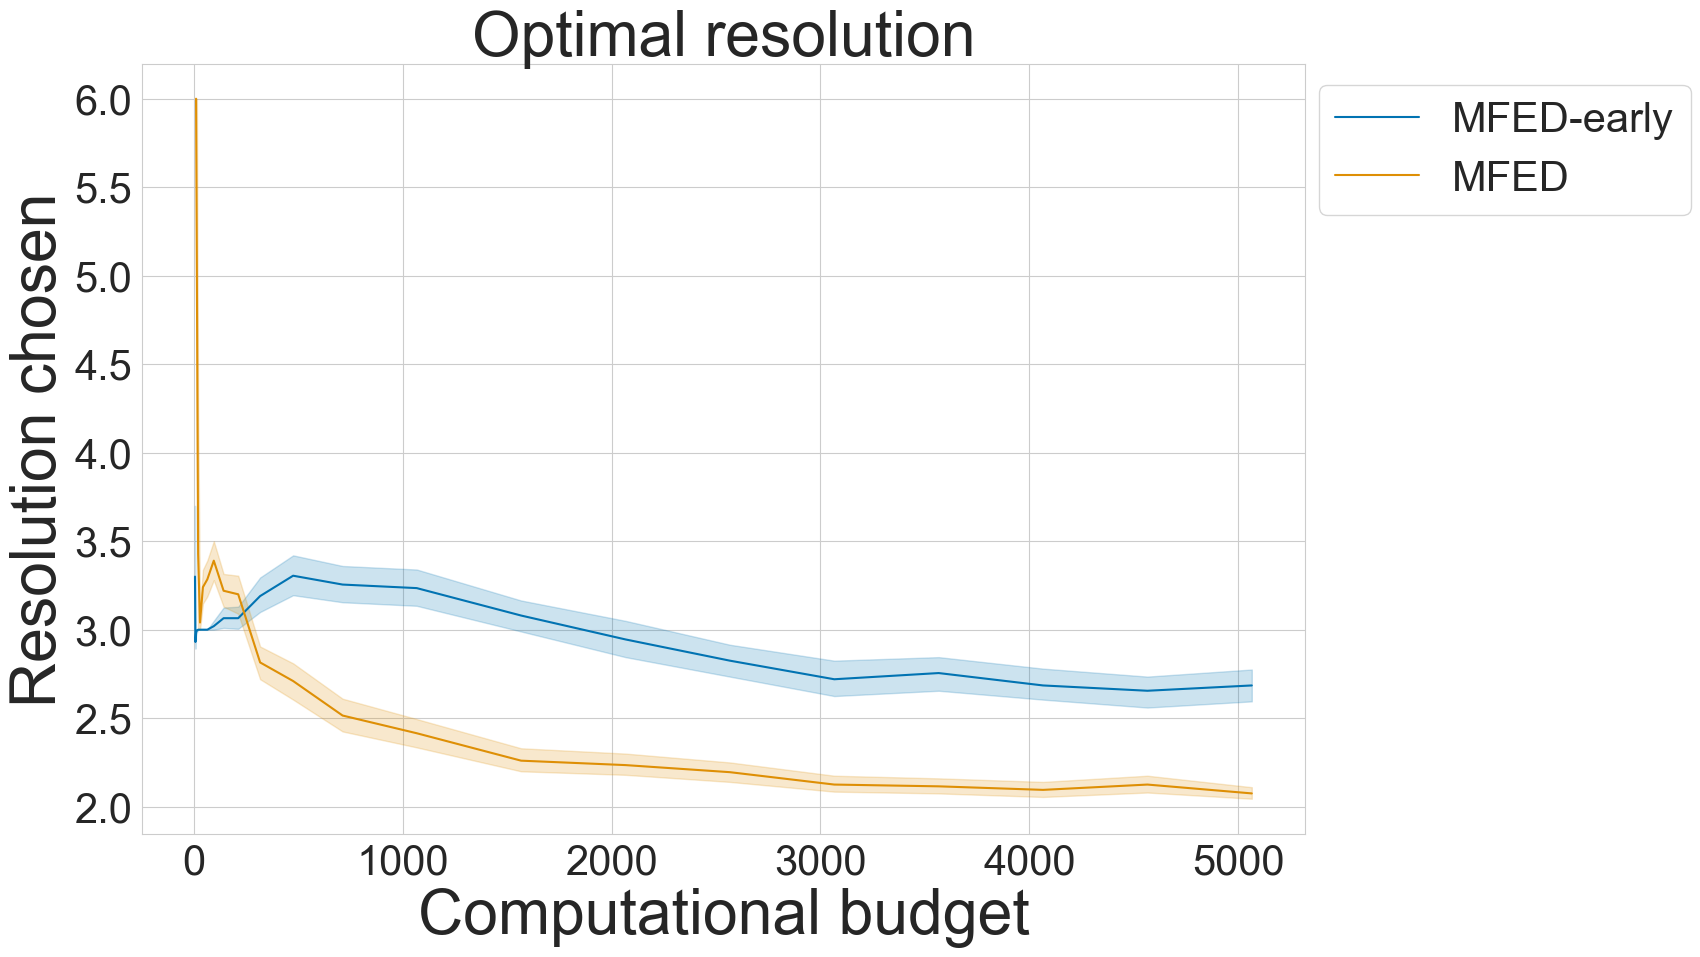

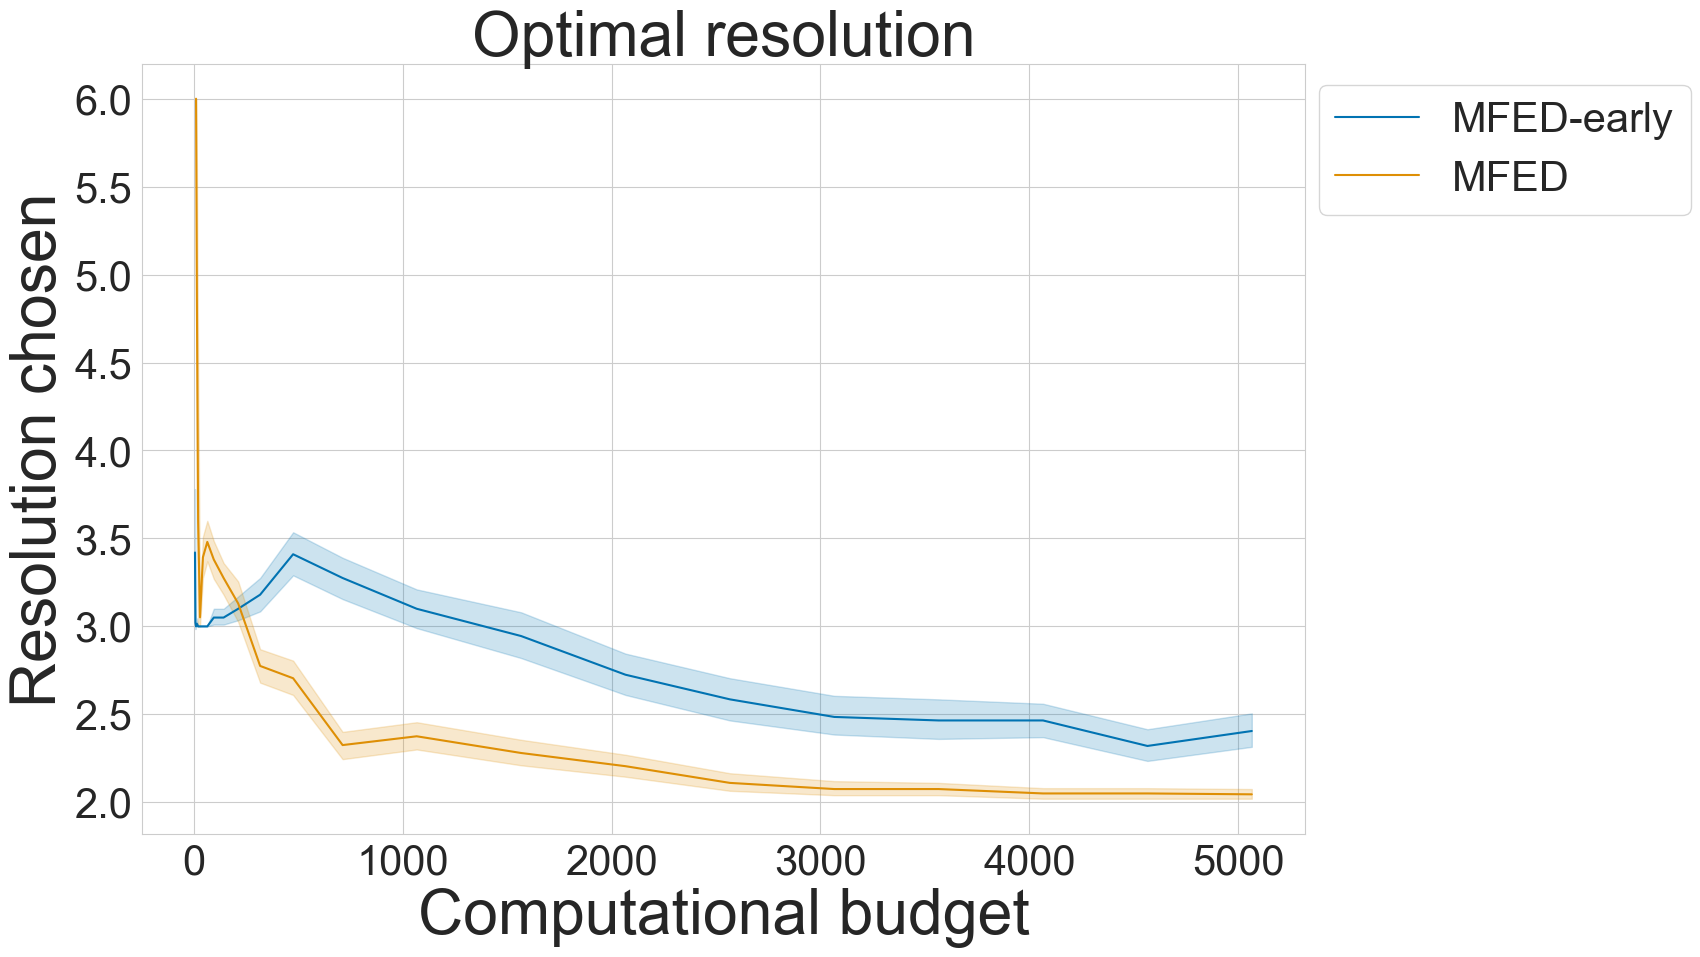

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    padded_data = np.pad(data, (window_size//2, window_size//2), mode='edge')
    return np.convolve(padded_data, window, mode='valid')

data_for_df = []
for melt, _ in melt_rate_list:
    for res in resolution_list:
        tmp = opt_res[melt][res]
        y = []
        x = []
        for idx, budget in enumerate(budget_list):
            try:
                for n in tmp[budget]:
                    data_for_df.append({
                        "resolution": res,
                        "melt": melt,
                        "chosen_res": n,
                        "budget": budget,
                    })
            except:
                continue

for m in [10,20]:

    plt.figure(figsize=(15,10))
    df = pd.DataFrame(data_for_df)
    df_sub = df[df["melt"] == m]

    df_sub.loc[df_sub["resolution"] == "mfed", "resolution"] = "MFED-early"
    df_sub.loc[df_sub["resolution"] == "mfed_early", "resolution"] = "MFED"


    sns.lineplot(df_sub,x="budget", y="chosen_res", hue="resolution")
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("Resolution chosen", fontsize=45)
    plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', fontsize=30, title_fontsize=45)
    plt.title(f"Optimal resolution", fontsize=45)
    path = f"./../assets/plots/fig_7/lengthscale_{m}.pdf"
    plt.savefig(path,bbox_inches='tight')




    plt.show()

      res  budget  melt_label     error
0  mfedkm       4          10  0.324135
1  mfedkm       4          10  0.145131
2  mfedkm       4          10  0.329023
3  mfedkm       4          10  0.228310
4  mfedkm       4          10  0.215038
10
./../assets/plots/fig_7/comp_10.pdf
20
./../assets/plots/fig_7/comp_20.pdf


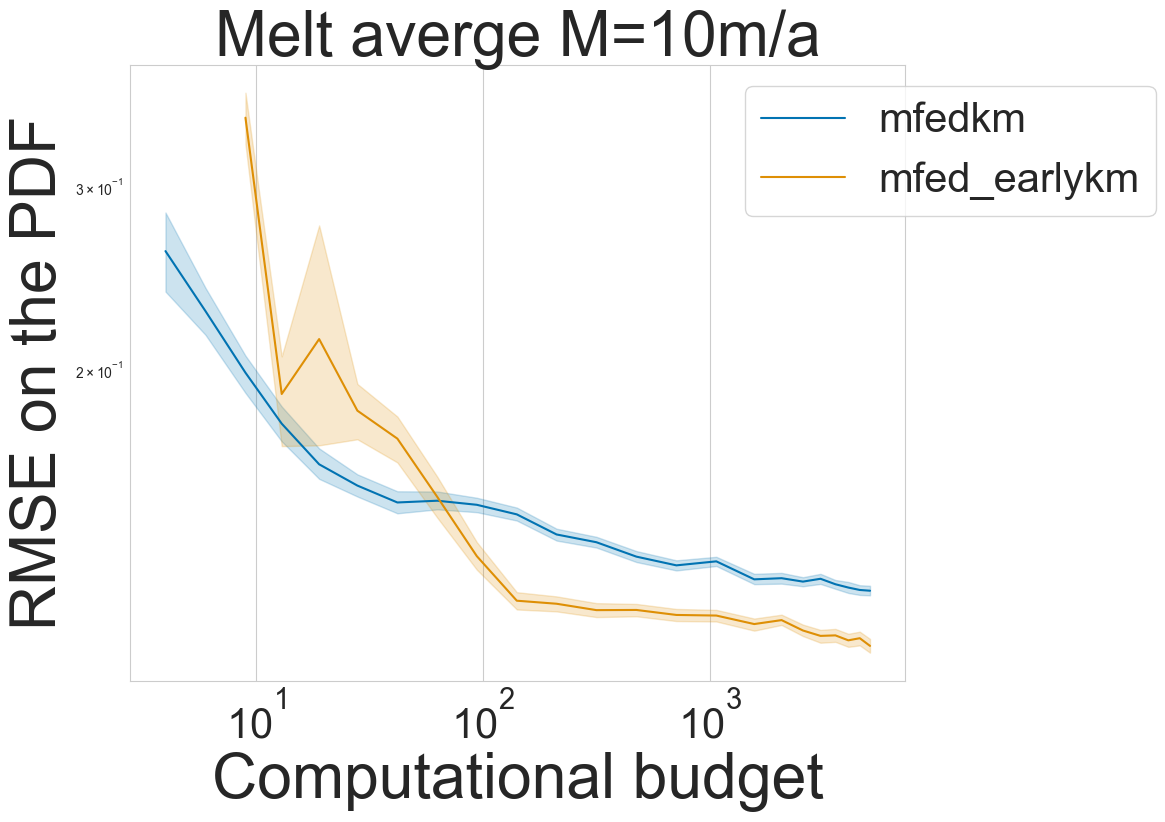

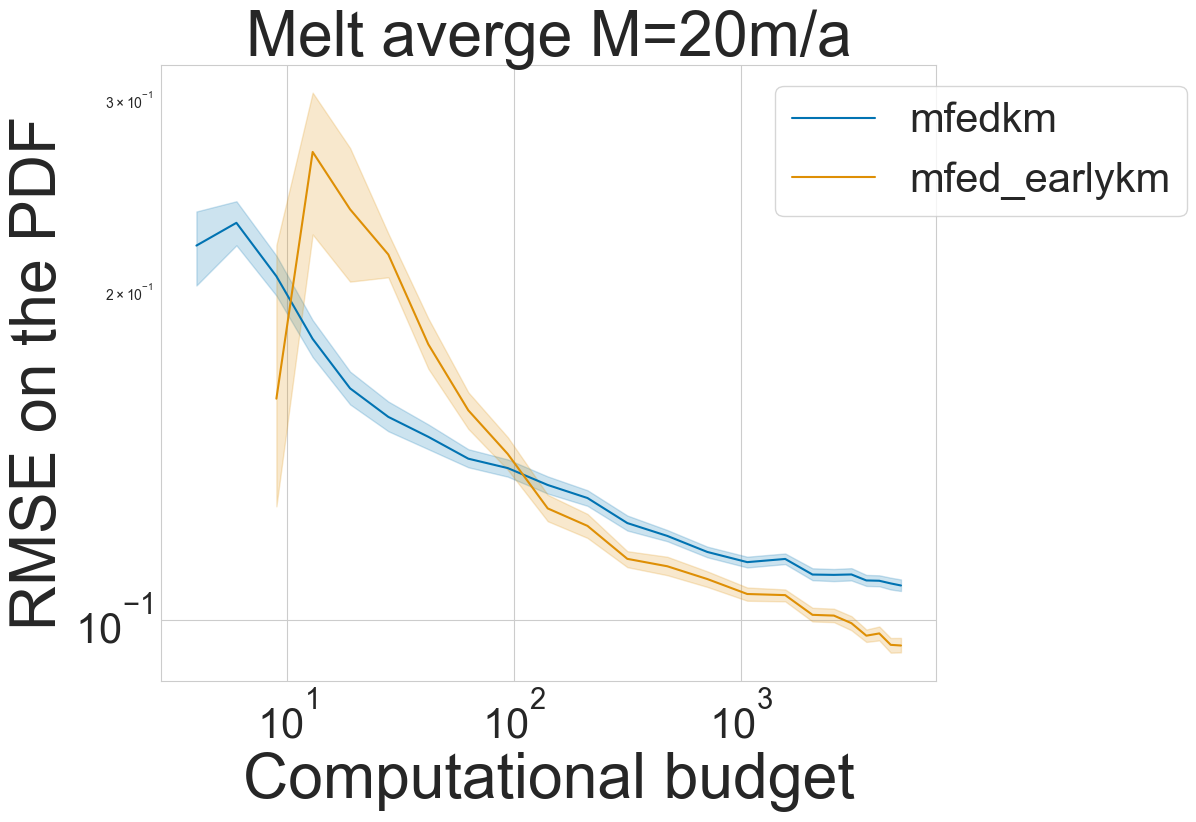

In [58]:

# Initialize an empty list to store the data
data_for_df = []

# Iterate through the pdf_errors dictionary to extract the necessary information
for melt_label, res_dict in pdf_errors.items():
    for res, budget_dict in res_dict.items():
        for budget, error_list in budget_dict.items():
            # For each error in the error_list, append a new record to the list
            if error_list is not None:
                for error in error_list:
                    data_for_df.append({
                        "res": str(res)+"km",
                        "budget": budget,
                        "melt_label": melt_label,
                        "error": error
                    })

# Convert the list of data into a pandas DataFrame
pdf_errors_df = pd.DataFrame(data_for_df)

# Display the first few rows of the DataFrame to verify
print(pdf_errors_df.head())


sns.set_palette('colorblind')
sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Arial'
for label in pdf_errors_df['melt_label'].unique():
    print(label)
    plt.figure(figsize=(10,8))
    sns.lineplot(data=pdf_errors_df[pdf_errors_df['melt_label'] == label], x="budget", y="error", hue="res")
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("RMSE on the PDF", fontsize=45)
    plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', fontsize=30, title_fontsize=45)
    plt.title(f"Melt averge M={label}m/a", fontsize=45)
    path = f"./../assets/plots/fig_7/comp_{str(label)}.pdf"
    print(path)
    plt.savefig(path,bbox_inches='tight')
    #plt.show()

In [170]:
pdf_errors_df

,res,budget,melt_label,error
0,mfedkm,4,10,0.311276
1,mfedkm,4,10,0.254059
2,mfedkm,4,10,0.310019
3,mfedkm,4,10,0.163247
4,mfedkm,4,10,0.161550
...,...,...,...,...
28433,mfed_75km,141,20,0.132371
28434,mfed_75km,141,20,0.134456
28435,mfed_75km,141,20,0.139183
28436,mfed_75km,141,20,0.124696


In [156]:
budget_dict[3]

[0.13371835669421542,
 0.2633142823804714,
 0.22699958129991002,
 0.20242531788205803,
 0.17656655121254905,
 0.1755998414660047,
 0.2697014185257434,
 0.21074454085651106,
 0.16716722288938957,
 0.22009331006768992,
 0.26759831874940054,
 0.11709408164301768,
 0.1813516004411756,
 0.1630128926721558,
 0.27061309375477854,
 0.20888473057522328,
 0.25071416890972165,
 0.15692023590968057,
 0.12058571975724693,
 0.15836401963990213,
 0.3060278952187119,
 0.18866487784491393,
 0.2554218979696256,
 0.13359460165889922,
 0.13156790083934689,
 0.3095655285868042,
 0.17795295326838478,
 0.24804317467285103,
 0.1449099475444755,
 0.21726414232325872,
 0.14494712984848984,
 0.17315111705968986,
 0.21225097972844822,
 0.2398629448405627,
 0.12295131937661909]

In [147]:
pdf_errors_df[pdf_errors_df["res"] == "mfed_75km"]

,res,budget,melt_label,error
12523,mfed_75km,3,10,0.193382
12524,mfed_75km,3,10,0.180620
12525,mfed_75km,3,10,0.295901
12526,mfed_75km,3,10,0.283310
12527,mfed_75km,3,10,0.289257
...,...,...,...,...
29634,mfed_75km,5066,20,0.103207
29635,mfed_75km,5066,20,0.111177
29636,mfed_75km,5066,20,0.112188
29637,mfed_75km,5066,20,0.121798


In [79]:
model_gpy = GPRegression(np.zeros((2,2)),np.zeros((2,2)),normalizer=True,noise_var=0.05)

 /Users/pierrethodoroff/miniconda3/envs/ice_sheet/lib/python3.11/site-packages/GPy/util/normalizer.py:94: UserWarning:Some values of Y have standard deviation of zero. Resetting to 1.0 to avoid divide by zero errors.


In [80]:
hmc = GPy.inference.mcmc.HMC(model_gpy,stepsize=5e-2)

In [81]:
s = hmc.sample(num_samples=200) # B

In [82]:
model_gpy.parameters[0].lengthscale[0]

9.685579491623018e-10

In [83]:
model_gpy.parameters[0].lengthscale[0] = 1

In [84]:
model_gpy.parameters[0].lengthscale[0]

1.0